# Fundamento teorico

**Regresion simple**

$$y= \beta_0 + \beta_1 x$$


**Regresion multiple**
$$y= \beta_0 + \beta_1 x_1 + \beta_2 x_2 $$


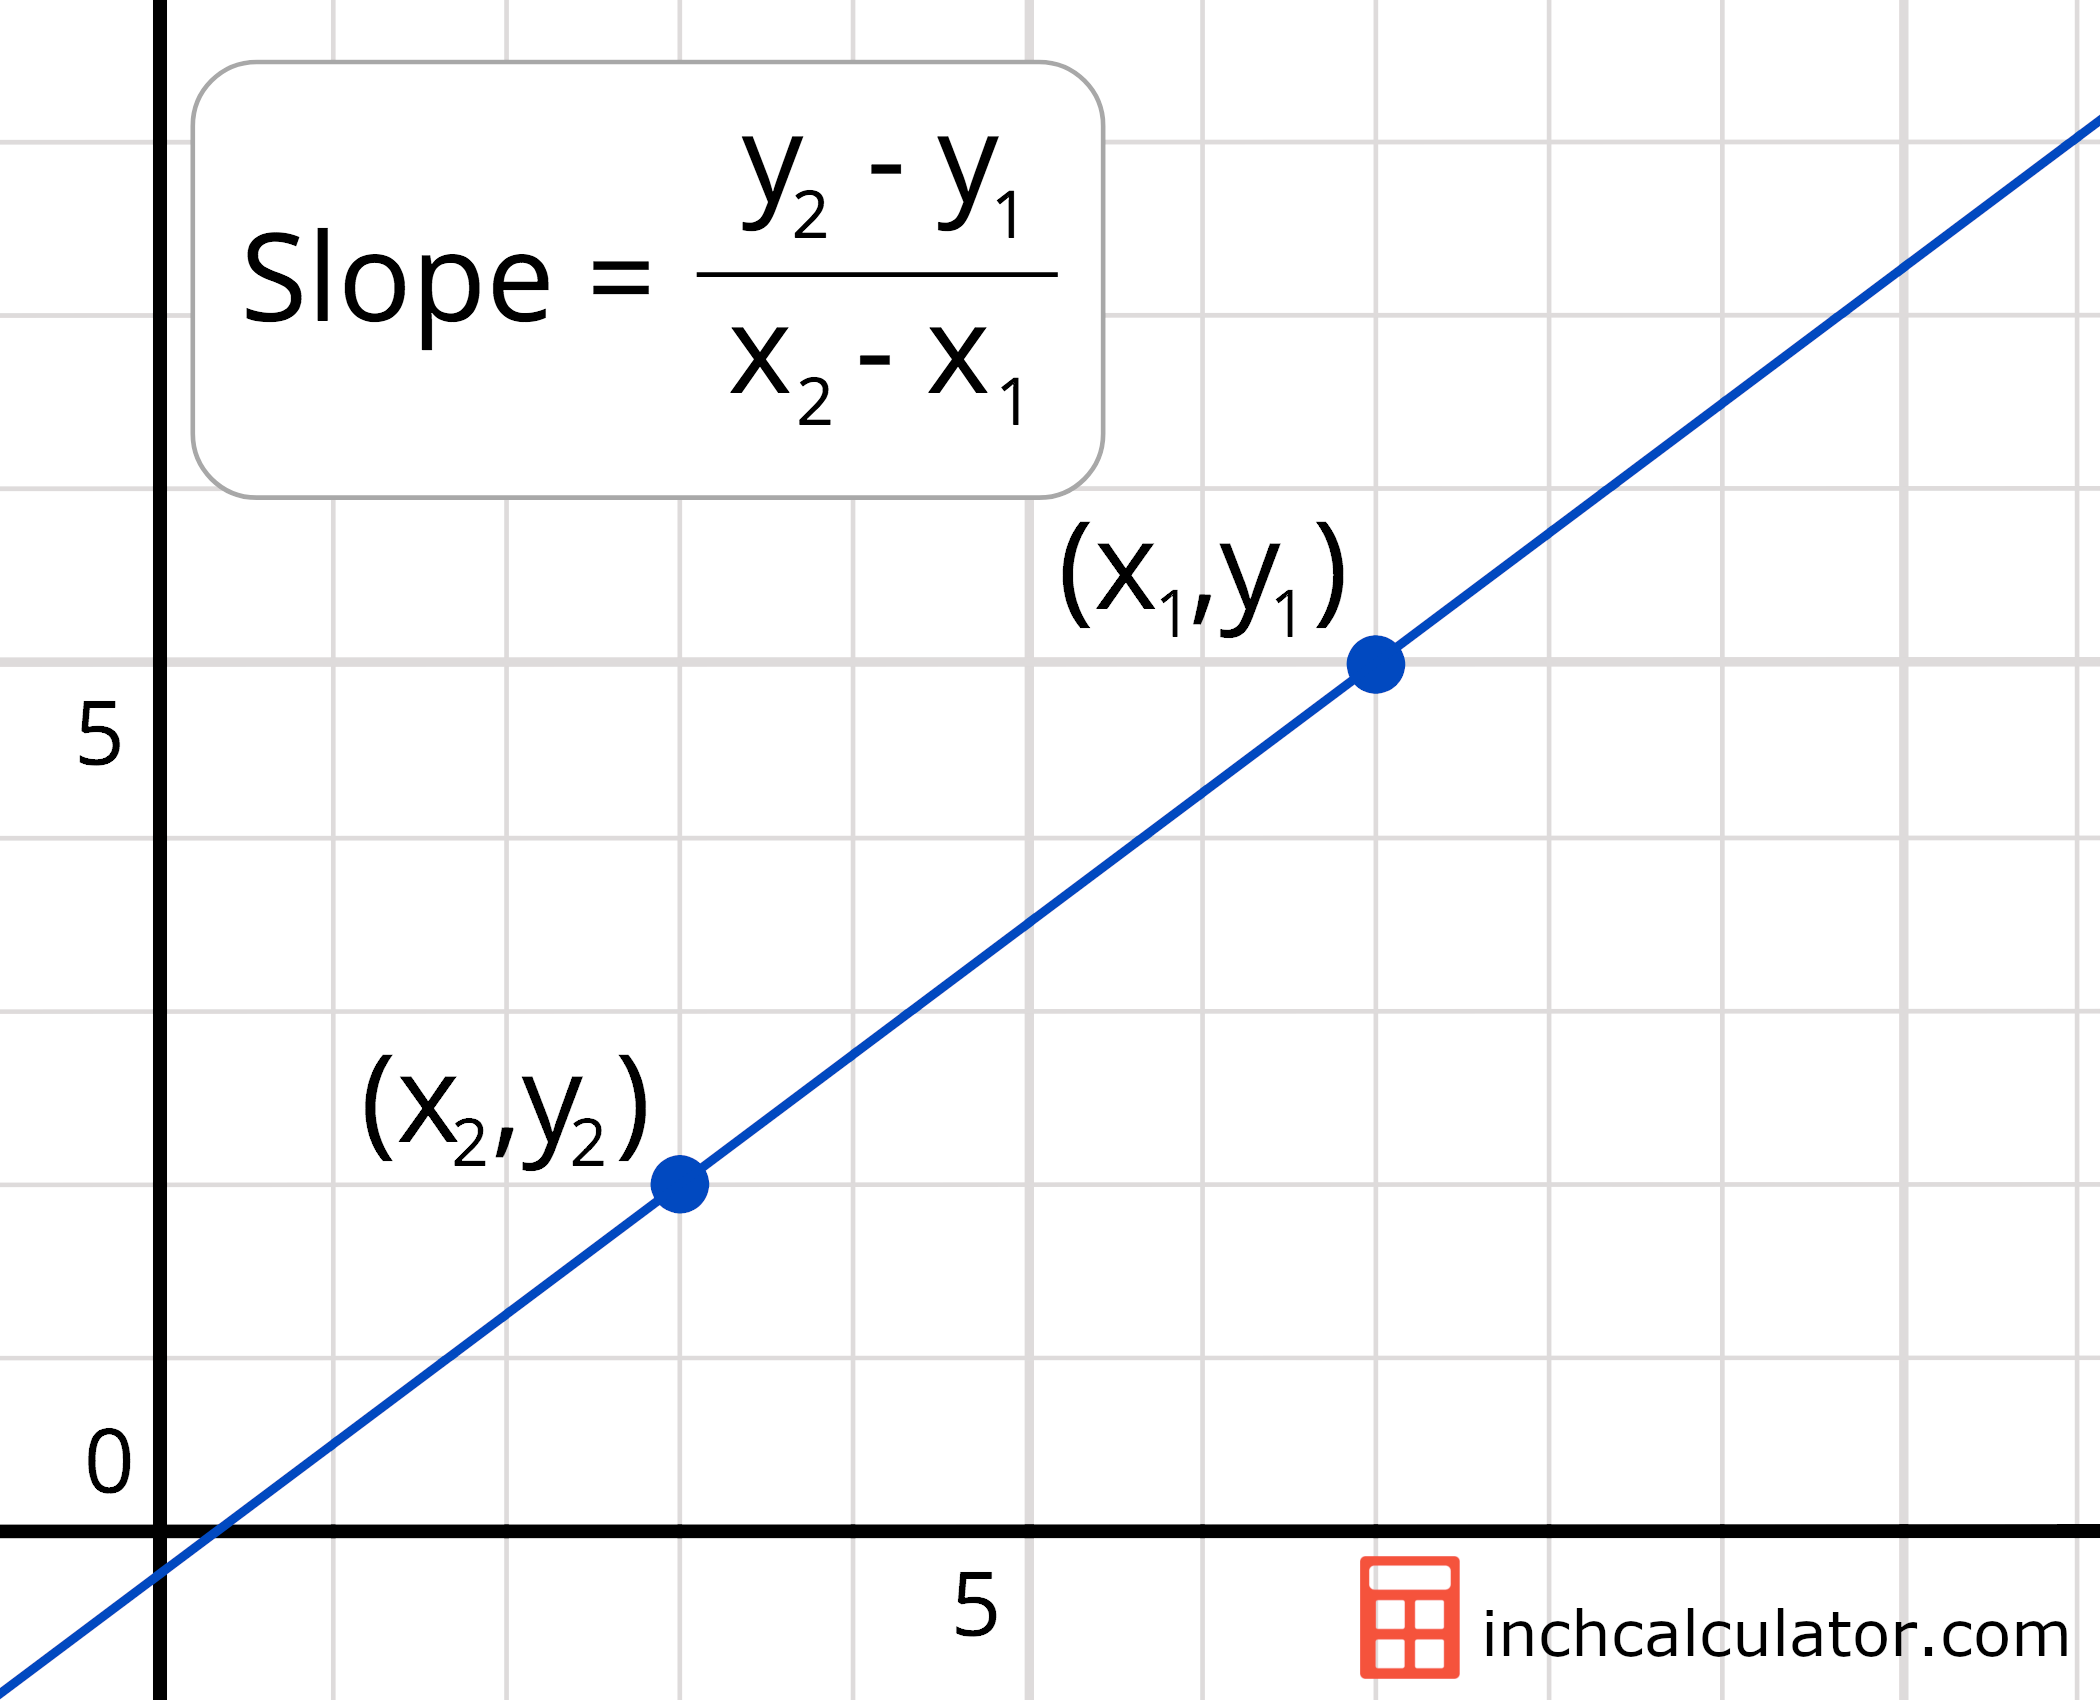

## REGRESIÓN LINEAL SIMPLE

In [1]:
#Importacion ded librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Importacion de los datos
dataset = pd.read_csv("../datasets/clase22/student_scores.csv", sep = ",")
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#Shape
dataset.shape

(25, 2)

In [6]:
#Analisis estadistico basico
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


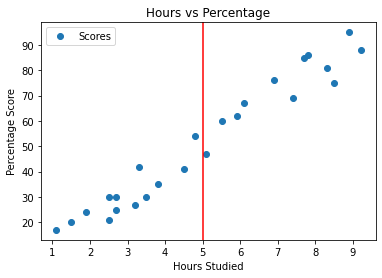

In [7]:
#Ploteamos el dataset
dataset.plot(x='Hours', y='Scores', style="o")
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.axvline(x=5,color='r')
plt.show()

In [8]:
#1) Preparacion de datos
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [9]:
#2) Empezamos a crear nuestro modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# 3) Entrenando el modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
#Recuperamos la intersección
print(regressor.intercept_)

2.826892353899737


In [12]:
#La pendiente
print(regressor.coef_)

[9.68207815]


In [13]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9]])

In [14]:
y_test

array([81, 30, 21, 76, 62], dtype=int64)

In [15]:
#Hacemos nuestras predicciones
y_pred = regressor.predict(X_test)
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

El y_pred es una matriz numpy que contiene todos los valores predichos para los valores de entrada en la X_test

In [16]:
#Convertimos en df la salida
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['Sesgo']=df.Actual -df.Predicted
df['Error_porc']=((df.Actual - df.Predicted)/df.Actual) *100
df

,Actual,Predicted,Sesgo,Error_porc
0,81,83.188141,-2.188141,-2.701409
1,30,27.032088,2.967912,9.893041
2,21,27.032088,-6.032088,-28.724227
3,76,69.633232,6.366768,8.377327
4,62,59.951153,2.048847,3.304591


## REGRESIÓN LINEAL MÚLTIPLE

In [17]:
dataset = pd.read_csv("../datasets/clase22/petrol_consumption.csv", sep = ",")
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [18]:
dataset.shape

(48, 5)

In [19]:
#Estadisticas
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [20]:
# 1 )Preparación de datos
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

In [21]:
# 2) Separacion en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Como se dijo anteriormente, en caso de regresión lineal multivariable, el modelo de regresión tiene que encontrar los coeficientes más óptimos para todos los atributos. Para ver qué coeficientes ha elegido nuestro modelo de regresión, podemos ejecutar el siguiente script:

In [23]:
# 'Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)'
regressor.coef_

array([-3.69937459e+01, -5.65355145e-02, -4.38217137e-03,  1.34686930e+03])

In [24]:
regressor.intercept_

361.4508790665325

In [25]:
X.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)'],
      dtype='object')

In [26]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-36.993746
Average_income,-0.056536
Paved_Highways,-0.004382
Population_Driver_licence(%),1346.869298


In [27]:
#Realizando las predicciones
y_pred = regressor.predict(X_test)
y_pred

array([606.69266519, 673.77944169, 584.99149034, 563.53691024,
       519.05867235, 643.46100256, 572.89761422, 687.07703573,
       547.6093662 , 530.03762971])

In [28]:
y_test

27    631
40    587
26    577
43    591
24    460
37    704
12    525
19    640
4     410
25    566
Name: Petrol_Consumption, dtype: int64

Para comparar los valores de salida reales X_test con los valores predichos, convertimos en df:

In [29]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['Sesgo']=df.Actual -df.Predicted
df['Error_porc']=((df.Actual -df.Predicted)/df.Actual) *100
df

,Actual,Predicted,Sesgo,Error_porc
27,631,606.692665,24.307335,3.852193
40,587,673.779442,-86.779442,-14.783551
26,577,584.991490,-7.991490,-1.385007
43,591,563.536910,27.463090,4.646885
24,460,519.058672,-59.058672,-12.838842
37,704,643.461003,60.538997,8.599289
12,525,572.897614,-47.897614,-9.123355
19,640,687.077036,-47.077036,-7.355787
4,410,547.609366,-137.609366,-33.563260
25,566,530.037630,35.962370,6.353776
